In [ ]:
### Requerimientos de Solucion:
- Poner tunombre y tu numero de control al jupiter y en un celda como Markdown
- Reliazar la exploracion de los datos para entenderlos, pude usar pandas o numpy
- hacer el modelo predictivo
- No olvidar las validaciones que considere necesarias
- Documentar y/o justificar cualquier decisión que tome en su desarrollo.
- Usar el nombre de variables, de funciones, de ciclos y de programas acorde a la problemática.
- Hacer correllaciones, scatters, heatmaps, boxplot, graficas y todo aquellas graficas que permitan mostrar los resultados  



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
df = pd.read_csv("df_arabica_clean.csv")

In [30]:
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


# Understanding the Data


## Number of rows and columns

In [31]:
num_rows, num_cols = df.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)

Número de filas: 207
Número de columnas: 41


## Number of categorical variables and number of unique values for each

In [33]:
categorical_vars = [var for var in df.columns if df[var].dtype == 'object']
num_categorical_vars = len(categorical_vars)
print("Número de variables categóricas:", num_categorical_vars)

for var in categorical_vars:
    unique_values = len(df[var].unique())
    print("Número de valores únicos para {}: {}".format(var, unique_values))

Número de variables categóricas: 22
Número de valores únicos para Country of Origin: 22
Número de valores únicos para Farm Name: 173
Número de valores únicos para Lot Number: 188
Número de valores únicos para Mill: 163
Número de valores únicos para ICO Number: 68
Número de valores únicos para Company: 72
Número de valores únicos para Altitude: 98
Número de valores únicos para Region: 121
Número de valores únicos para Producer: 173
Número de valores únicos para Bag Weight: 39
Número de valores únicos para In-Country Partner: 21
Número de valores únicos para Harvest Year: 7
Número de valores únicos para Grading Date: 75
Número de valores únicos para Owner: 80
Número de valores únicos para Variety: 49
Número de valores únicos para Status: 1
Número de valores únicos para Processing Method: 11
Número de valores únicos para Color: 12
Número de valores únicos para Expiration: 75
Número de valores únicos para Certification Body: 21
Número de valores únicos para Certification Address: 21
Número

## Missing values

In [34]:
missing_values = df.isnull().sum()
print("Valores faltantes:")
print(missing_values)

Valores faltantes:
Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects    

## Summary statistics for attributes and labels

In [4]:
summary_statistics = df.describe()
print("Estadísticas:")
print(summary_statistics)

Estadísticas resumidas:
              age        sex   chest pain type  resting blood pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       serum cholestoral  fasting blood sugar  \
count         270.000000           270.000000   
mean          249.659259             0.148148   
std            51.686237             0.355906   
min           126.000000             0.000000   
25%           213.000000             0.000000   
50%           2

# Graficamos

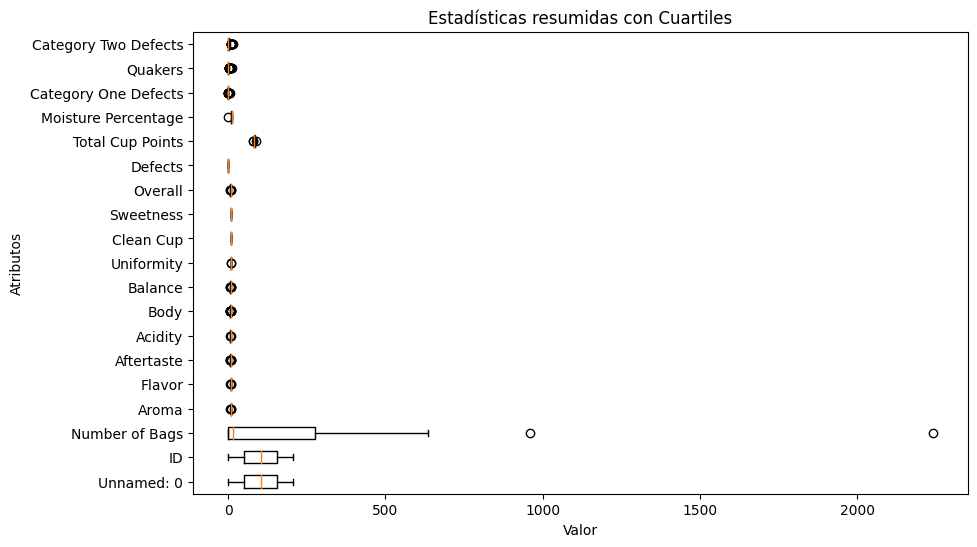

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

numeric_data = df.select_dtypes(include=[np.number]).values
column_labels = list(df.select_dtypes(include=[np.number]).columns)
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(numeric_data, vert=False)
ax.set_yticklabels(column_labels)
ax.set_xlabel("Valor")
ax.set_ylabel("Atributos")
ax.set_title("Estadísticas resumidas con Cuartiles")
plt.show()

## Metricas para medir el desempeño de los modelos
- Mean squared error - Error cuadratico medio: $MSE= \frac{1}{m}\sum_{i=1}^{m}(x_{i}-pred(x_{i}))^{2} $
- Mean absolute error- Error obsoluto medio: $MAE=\frac{1}{m}\sum_{i=1}^{m}|x_{i}-pred(x_{i})|$ 

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargar el conjunto de datos
df = pd.read_csv("df_arabica_clean.csv")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)

Error cuadrático medio (MSE): 0.16359472189397786
Error absoluto medio (MAE): 0.36443671941199185


## Receiver Operating Characteristics (ROC)

The ROC curve yields a single plot that summarizes all of these different contingency 
tables. The ROC curve plots the true positive rate ($TPR=\frac{TP}{TP+FN}$) versus 
the false positive rate ($FPR=\frac{FP}{TN+FP}$). 
- TPR is the proportion of positive examples that 
are correctly classified as positive. 
- FPR is the number of FPs 
relative to the total number of actual negatives.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("df_arabica_clean.csv")

# Seleccionar las columnas numéricas para el modelo
columnas_numericas = ['ID', 'Number of Bags', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
                      'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
                      'Defects', 'Total Cup Points', 'Moisture Percentage',
                      'Category One Defects', 'Quakers', 'Category Two Defects']

# Convertir la columna "Quakers" en una variable binaria
df['Quakers'] = df['Quakers'].apply(lambda x: 1 if x > 0 else 0)

In [49]:
# Seleccionar la columna objetivo
y_actual = df["Quakers"]

# Realizar la codificación one-hot de las variables categóricas
df_encoded = pd.get_dummies(df[columnas_numericas])

# Combinar las columnas numéricas codificadas con la columna objetivo
X = pd.concat([df_encoded, df[columnas_numericas]], axis=1)

In [50]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.2, random_state=42)

# Entrenar tu modelo con los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [51]:
# Obtener las probabilidades predichas por el modelo
y_pred_prob = modelo.predict(X_test)

# Calcular el FPR, TPR y umbral utilizando la función roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

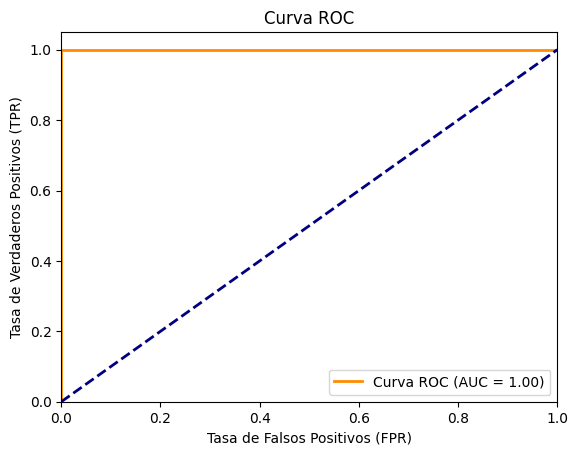

In [52]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## LassoCV demo with data normalization and no normalization

In [95]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
df = pd.read_csv('df_arabica_clean.csv')

# Seleccionar las columnas numéricas
columnas_numericas = ['Aroma']

In [112]:
# Filtrar el DataFrame solo con las columnas numéricas y la columna objetivo
df_numericas = df[columnas_numericas + ['Overall']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_numericas.drop('Overall', axis=1)
y = df_numericas['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Sin normalización
modelo_lasso = LassoCV(cv=5)
modelo_lasso.fit(X_train, y_train)

LassoCV(cv=5)

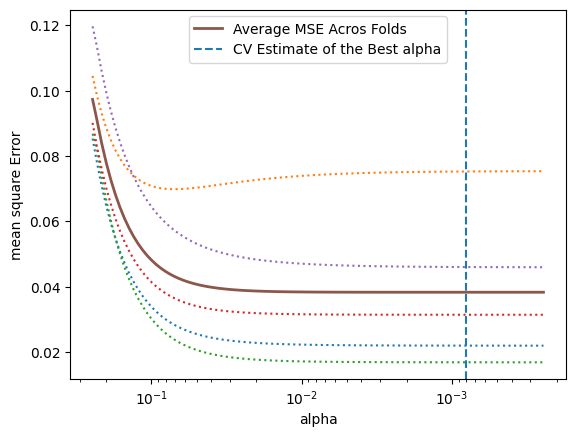

In [114]:
#Display results whit normalization process aply
plt.plot(modelo_lasso_normalizado.alphas_,modelo_lasso_normalizado.mse_path_,':')
plt.plot(modelo_lasso_normalizado.alphas_,modelo_lasso_normalizado.mse_path_.mean(axis=-1),label='Average MSE Acros Folds',linewidth=2)
plt.axvline(modelo_lasso_normalizado.alpha_,linestyle='--',label='CV Estimate of the Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("alpha")
plt.ylabel("mean square Error")
plt.show()

In [115]:
# Con normalización
escalador = StandardScaler()
X_train_normalizado = escalador.fit_transform(X_train)
X_test_normalizado = escalador.transform(X_test)

modelo_lasso_normalizado = LassoCV(cv=5)
modelo_lasso_normalizado.fit(X_train_normalizado, y_train)

LassoCV(cv=5)

In [116]:
score_sin_normalizacion = modelo_lasso.score(X_test, y_test)
score_con_normalizacion = modelo_lasso_normalizado.score(X_test_normalizado, y_test)

# Resultados
print("Rendimiento del modelo sin normalización:", score_sin_normalizacion)
print("Rendimiento del modelo con normalización:", score_con_normalizacion)

Rendimiento del modelo sin normalización: 0.7566141136745845
Rendimiento del modelo con normalización: 0.7566141136745848


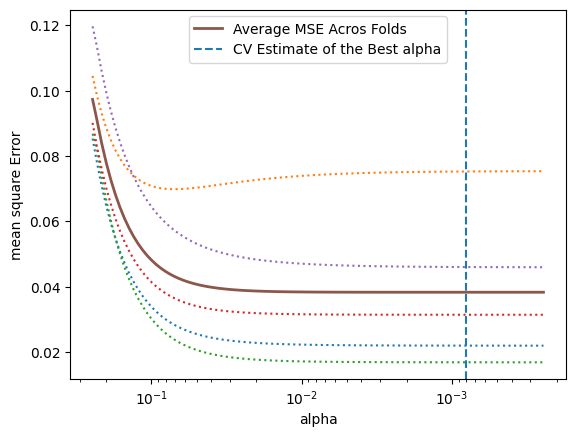

In [117]:
#Display results whit normalization process aply
plt.plot(modelo_lasso_normalizado.alphas_,modelo_lasso_normalizado.mse_path_,':')
plt.plot(modelo_lasso_normalizado.alphas_,modelo_lasso_normalizado.mse_path_.mean(axis=-1),label='Average MSE Acros Folds',linewidth=2)
plt.axvline(modelo_lasso_normalizado.alpha_,linestyle='--',label='CV Estimate of the Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("alpha")
plt.ylabel("mean square Error")
plt.show()

## Lasso Training on Full Data Set

In [108]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, lasso_path, Lasso

columnas_numericas = ['Aroma']
df_numericas = df[columnas_numericas + ['Overall']]
X = df_numericas.drop('Overall', axis=1)
y = df_numericas['Overall']
# Normalizar los datos
escalador = StandardScaler()
X_normalizado = escalador.fit_transform(X)

# Entrenar el modelo Lasso
modelo_lasso = LassoCV(cv=5)
modelo_lasso.fit(X_normalizado, y)

LassoCV(cv=5)

In [110]:
# Obtener el coeficiente de determinación R^2
rendimiento = modelo_lasso.score(X_normalizado, y)
print("Rendimiento del modelo Lasso en el conjunto de datos :", rendimiento)

Rendimiento del modelo Lasso en el conjunto de datos : 0.6428258574090155
